In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%run 'Functions.ipynb'

## 1. Testing

#### 1.1. Cross-validation with one fitness potential

In [23]:
chunk = 'S1'
train_weights = {}
fitness_potential = {}
true = {}
predicted = {}

data, labels, unique_mutations, aa_ses = read_data(chunk)

counter = 0

for iterations in range(5):
        print (counter)
        X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.05)
        model = Sequential()
        init = initializers.Orthogonal(gain=1.0, seed=None)

        model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
        model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
        model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

        opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

        model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)

        model.fit(X_train, y_train, epochs=200, batch_size=500, shuffle=True, verbose=0)

        proba = model.predict_proba(X_train, batch_size=500, verbose=0)
        true[counter] = y_train
        predicted[counter] = proba.flatten()

        train_weights[counter] = model.layers[0].get_weights()[0]
        fitness_potential[counter] = X_train.dot(train_weights[counter])

        counter += 1

0
1
2
3
4


In [20]:
predicted

{0: array([ 0.64311665,  0.64311665,  0.64311665, ...,  0.64311665,
         0.64311665,  0.64311665], dtype=float32),
 1: array([ 0.64227611,  0.64227611,  0.64227611, ...,  0.64227611,
         0.64227611,  0.64227611], dtype=float32),
 2: array([ 0.63679588,  0.63679588,  0.63679588, ...,  0.63679588,
         0.63679588,  0.63679588], dtype=float32),
 3: array([ 0.65267426,  0.65267432,  0.65267432, ...,  0.65267426,
         0.65267426,  0.65267426], dtype=float32),
 4: array([ 0.6443643 ,  0.64436424,  0.64436424, ...,  0.6443643 ,
         0.6443643 ,  0.6443643 ], dtype=float32)}

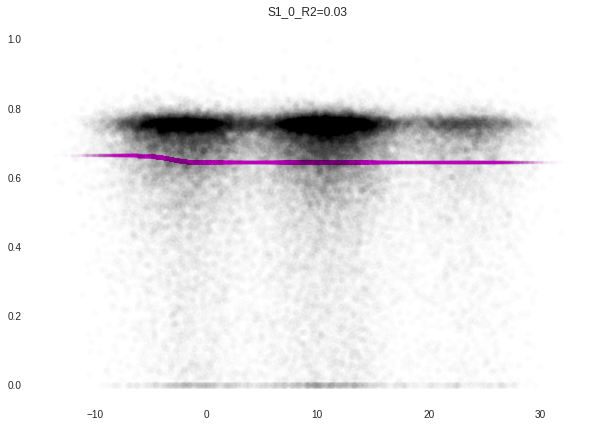

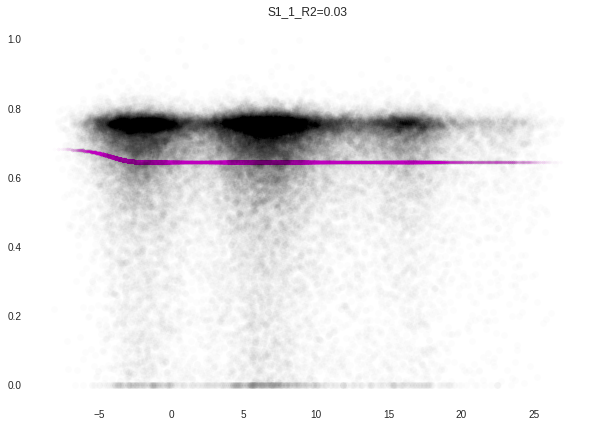

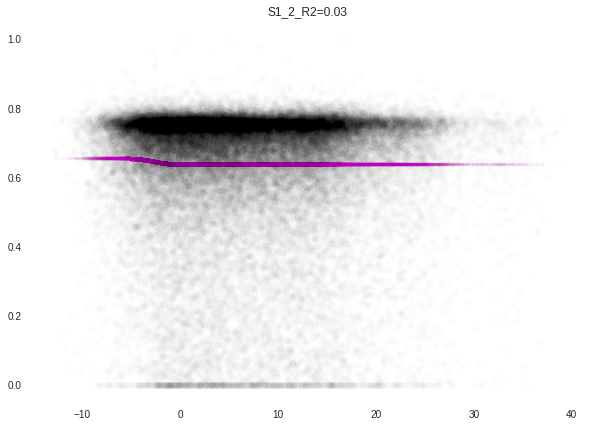

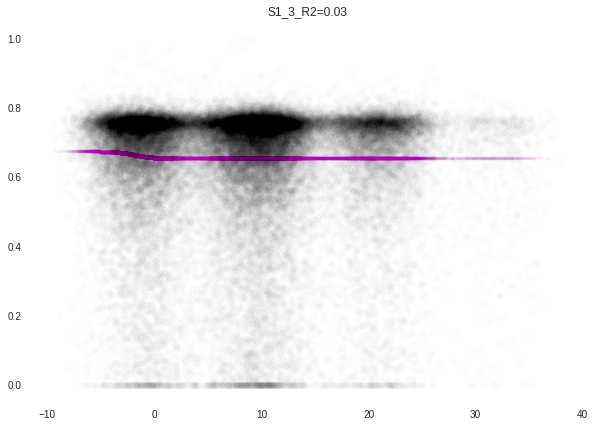

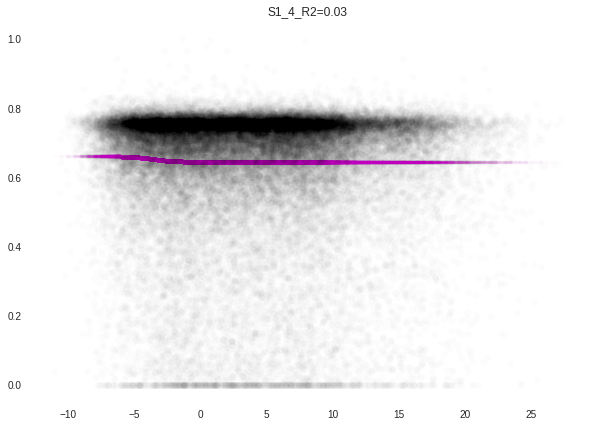

In [21]:
for i in range(5):
    _,_,R,_,_ = stats.linregress(true[i],predicted[i])
    plt.figure(figsize = [10,7])
    plt.plot(fitness_potential[i], true[i], 'ok', alpha = 0.01)
    plt.plot(fitness_potential[i], predicted[i], '.m', alpha = 0.01)
    plt.title(chunk+'_'+str(i) + '_R2=%.2f' % R);

#### 1.2. Cross-validation with double fitness potential

In [ ]:
chunk = 'S1'
train_weights = {}
fitness_potential = {}
true = {}
predicted = {}

data, labels, unique_mutations, aa_ses = read_data(chunk)

cv = cross_validation.StratifiedKFold(labels, n_folds = 10, shuffle = True)
counter = 0

for train_idx, test_idx in cv:
    if counter<5:
        print (counter)
        X_train, y_train = data[train_idx,:], labels[train_idx]
        X_test, y_test = data[test_idx,:], labels[test_idx]

        model = Sequential()
        init = initializers.Orthogonal(gain=1.0, seed=None)

        model.add(Dense(2, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
        model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
        model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

        opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

        model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)

        model.fit(X_train, y_train, epochs=200, batch_size=500, shuffle=True, verbose=0)

        proba = model.predict_proba(X_train, batch_size=500, verbose=0)
        true[counter] = y_train
        predicted[counter] = proba.flatten()

        train_weights[counter] = model.layers[0].get_weights()[0]
        fitness_potential[counter] = X_train.dot(train_weights[counter])

        counter += 1

0
1
2
3


IndexError: index 1 is out of bounds for axis 1 with size 1

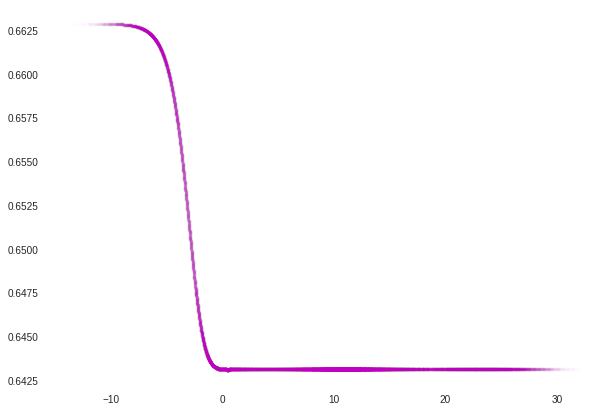

In [16]:
for i in range(5):
    _,_,R,_,_ = stats.linregress(true[i],predicted[i])
    plt.figure(figsize = [10,7])
#     plt.plot(fitness_potential[i][:,1], true[i], 'ok', alpha = 0.01)
    plt.plot(fitness_potential[i][:,0], predicted[i], '.m', alpha = 0.01)
    plt.plot(fitness_potential[i][:,1], predicted[i], '.c', alpha = 0.01)
    plt.title(chunk+'_'+str(i) + '_R2=%.2f' % R);

***